# Übungszettel 3 - Syntax (2. Teil) & Semantik
### Abgabefrist: Freitag, 2. Juni 2023, 9:59 Uhr

_Umbenennung des Jupyter Notebooks mit Gruppenname und Techfak-Kürzel!_

Punkte insgesamt möglich: _20 Punkte_

## Aufgabe 1: _(5 Punkte)_

In [2]:
from IPython.display import display, Markdown

def display_grammar_table(grammar, name):
    arrow,ln_break = "→", "\n"
    display(Markdown(f"""
| Grammatik {name} |  |  |
| ---: | :----: | :--- |
{''.join(f"| {s}| {arrow} | {' ⎮ '.join(map(lambda x: f'_{x}_', t)) if isinstance(t, set) else (' '.join(t) if isinstance(t, tuple) else t)}|{ln_break}" for s, t in grammar)}
"""))

def highlight_sentence(sentence, name):
    display(Markdown(f"""
**{name}:**
> {sentence}"""))

s1 = "she writes a letter"  #.
s2 = "does she book a flight from Houston to TWA"  #?

g1 = [
    ('S', ('NP', 'VP')),
    ('S', ('X1', 'VP')),
    ('X1', ('Aux', 'NP')),
    ('S', ('Verb', 'NP')),
    ('S', ('X2', 'PP')),
    ('S', ('Verb', 'PP')),
    ('S', ('VP', 'PP')),
    ('NP', ('Det', 'Nominal')),
    ('Nominal', ('Nominal', 'Noun')),
    ('Nominal', ('Nominal', 'PP')),
    ('VP', ('Verb', 'NP')),
    ('VP', ('X2', 'PP')),
    ('X2', ('Verb', 'NP')),
    ('VP', ('Verb', 'PP')),
    ('VP', ('VP', 'PP')),
    ('PP', ('Preposition', 'NP')),
    ('Det', {'a', 'the', 'that', 'this'}),
    ('Noun', {'meal', 'money', 'book', 'flight'}),
    ('Nominal', {'meal', 'money', 'book', 'flight'}),
    ('S', {'book', 'include', 'prefer'}),
    ('Verb', {'book', 'include', 'prefer'}),
    ('VP', {'book', 'include', 'prefer'}),
    ('Pronoun', {'me', 'I', 'she'}),
    ('Proper-Noun', {'Houston', 'TWA'}),
    ('NP', {'me', 'I', 'she'}),
    ('NP', {'Houston', 'TWA'}),
    ('Aux', {'does'}),
    ('Preposition', {'from', 'near', 'through', 'on', 'to'})
]

display_grammar_table(g1, "G1")
highlight_sentence(s1, "S1")
highlight_sentence(s2, "S2")


| Grammatik G1 |  |  |
| ---: | :----: | :--- |
| S| → | NP VP|
| S| → | X1 VP|
| X1| → | Aux NP|
| S| → | Verb NP|
| S| → | X2 PP|
| S| → | Verb PP|
| S| → | VP PP|
| NP| → | Det Nominal|
| Nominal| → | Nominal Noun|
| Nominal| → | Nominal PP|
| VP| → | Verb NP|
| VP| → | X2 PP|
| X2| → | Verb NP|
| VP| → | Verb PP|
| VP| → | VP PP|
| PP| → | Preposition NP|
| Det| → | _the_ ⎮ _a_ ⎮ _this_ ⎮ _that_|
| Noun| → | _money_ ⎮ _flight_ ⎮ _book_ ⎮ _meal_|
| Nominal| → | _money_ ⎮ _flight_ ⎮ _book_ ⎮ _meal_|
| S| → | _include_ ⎮ _book_ ⎮ _prefer_|
| Verb| → | _include_ ⎮ _book_ ⎮ _prefer_|
| VP| → | _include_ ⎮ _book_ ⎮ _prefer_|
| Pronoun| → | _me_ ⎮ _she_ ⎮ _I_|
| Proper-Noun| → | _Houston_ ⎮ _TWA_|
| NP| → | _me_ ⎮ _she_ ⎮ _I_|
| NP| → | _Houston_ ⎮ _TWA_|
| Aux| → | _does_|
| Preposition| → | _from_ ⎮ _near_ ⎮ _on_ ⎮ _to_ ⎮ _through_|




**S1:**
> she writes a letter


**S2:**
> does she book a flight from Houston to TWA

### A1.1: _(2 Punkte)_
Erklärt anhand von G1, S1 und ausgewählten Beispielsituationen bei der Anwendung des Algorithmus, warum Top-Down-Parsing Ansatz für die Syntaktische Analyse von S1 eher ungeeignet ist.

Führen wir mal Top-Down-Parsing durch und gucken wo es Probleme gibt:

S --> NP VP --> NP Verb NP --> NP Verb Det Nominal

Alles gut und fine aber die Probleme sind:

1. Es gibt halt mehrere Regeln und mögliche Ableitungen die zu S führen könnten. Zum Beispiel könnten wir mit S --> Aux NP starten. Dadurch das es mehrere Ableitungen gibt erhöht dies die Komplexität bei den Algorithmus
2. Außerdem könnte die Regel VP --> VP PP zu einer unendlichen Schleife im Algo führen und das wollen wir natürlich ja nicht

Außerdem sind nichtmal die Wörter enthalten... Das macht jedes Parsing natürlich nicht gut/möglich

#### Antwort:
    

### A1.2: _(2 Punkte)_
Beschreibt wie der CKY-Algorithmus Bottom-Up-Parsing realisiert. Benutzt S1 um zu skizzieren wie der Algorithmus angewandt werden kann um die syntaktische Struktur von S1 zu parsen. Welche Eigenschaft muss G1 dafür erfüllen?

#### Antwort:
    Der CKY-Algorithmus setzt Bottom-Up-Parsing wie folgt um: Er schaut sich erstmal das Wort an und schaut von dort wie er alle Nachbarn am besten zusammenfassen kann falls möglich. Sobald er alle Nachbarn zusammengefasst hat schaut er sich an mit welchen Kombinationen wieder diese Nachbarn zusammengefasst werden können. Es ist wie eine Pyramide und an der Spitze ist die Ableitung um das gesamte Wort zu bilden. Hier werde ich es einmal visuell zeigen:

    Es ist nicht wirklich möglich den CKY Algorithmus anzuwenden, da zwei der Wörter nicht in der Grammatik gegeben sind.
    
    Damit der Algorithmus an eine Grammatik angewandt werden kann muss die Grammatik in der Chromski-Normalform sein. Dabei besagt es, dass jede Produktionsregel die Form: A --> B C oder A --> a hat

### A1.3: _(1 Punkt)_

| Grammatik G2 |        |                             |
| ---:         | :----: | :---                        |
| S            |→       | Aux NP VP                   |
| S            |→       | VP                          |
| NP           |→       | Pronoun                     |
| VP           |→       | Verb                        |
| VP           |→       | Verb NP                     |
| VP           |→       | Verb PP                     |
| Verb         |→       | _book_ ⎮ _leave_ ⎮ _arrive_ |
| Pronoun      |→       | _I_ ⎮ _she_ ⎮ _me_          |



Überprüft ob die Grammatik G2 die in Teilaufgabe A1.2 gesuchte Eigenschaft erfüllt. Argumentiert warum sie diese Eigenschaft erfüllt, bzw. nicht erfüllt. Überführt G2 gegebenenfalls in eine Form, in der sie für den CKY Algorithmus anwendbar wird.

#### Antwort:
    Die Eigenschaft auf die überprüft werden muss ist die Chromsky Normalform. Die Grammatik G2 ist in diesem Fall nicht in der Chromsky Normalform, da in einer CNF jede Regel entweder genau zwei Variablen hat oder genau ein Terminalsymbol. Hier finden wir direkt innerhalb der ersten Regel den Fehler. S --> Aux NP VP hat 3 Variablen. Das zeigt direkt das unsere gegebene Grammatik G3 nicht in der CNF ist.

| Grammatik G2 |        |                             |
| ---:         | :----: | :---                        |
| S            |→       | X1 VP                       |
| X1           |→       | Aux NP                      |
| S            |→       | VP                          |
| NP           |→       | Pronoun                     |
| VP           |→       | Verb                        |
| VP           |→       | Verb NP                     |
| VP           |→       | Verb PP                     |
| Verb         |→       | Verb1                       |
| Verb         |→       | Verb2                       |
| Verb         |→       | Verb3                       |
| Verb1        |→       | _book_                      |
| Verb2        |→       | _leave_                     |
| Verb3        |→       | _arrive_                    |
| Pronoun      |→       | _I_ ⎮ _she_ ⎮ _me_          |  

Diese Grammatik wäre in der CNF. Warum? Wir haben die Probleme behoben. Die Probleme waren die erste Regel da sie aus 3 Symbolen bestand. Hier haben wir sie in 2 regelanwendungen runter gesplitted und die Verben, da diese aus Terminalen und nichtterminalen Symbolen bestand.

## Aufgabe 2: _(8 Punkte)_

### A2.1: _(2 Punkte)_
Implementiert den CKY-Algorithmus und wendet den CKY-Algorithmus auf S2 an. Generiert eine Parsingtabelle aller möglichen Parses des Algorithmus. Verwendet dazu die Grammatik G1.

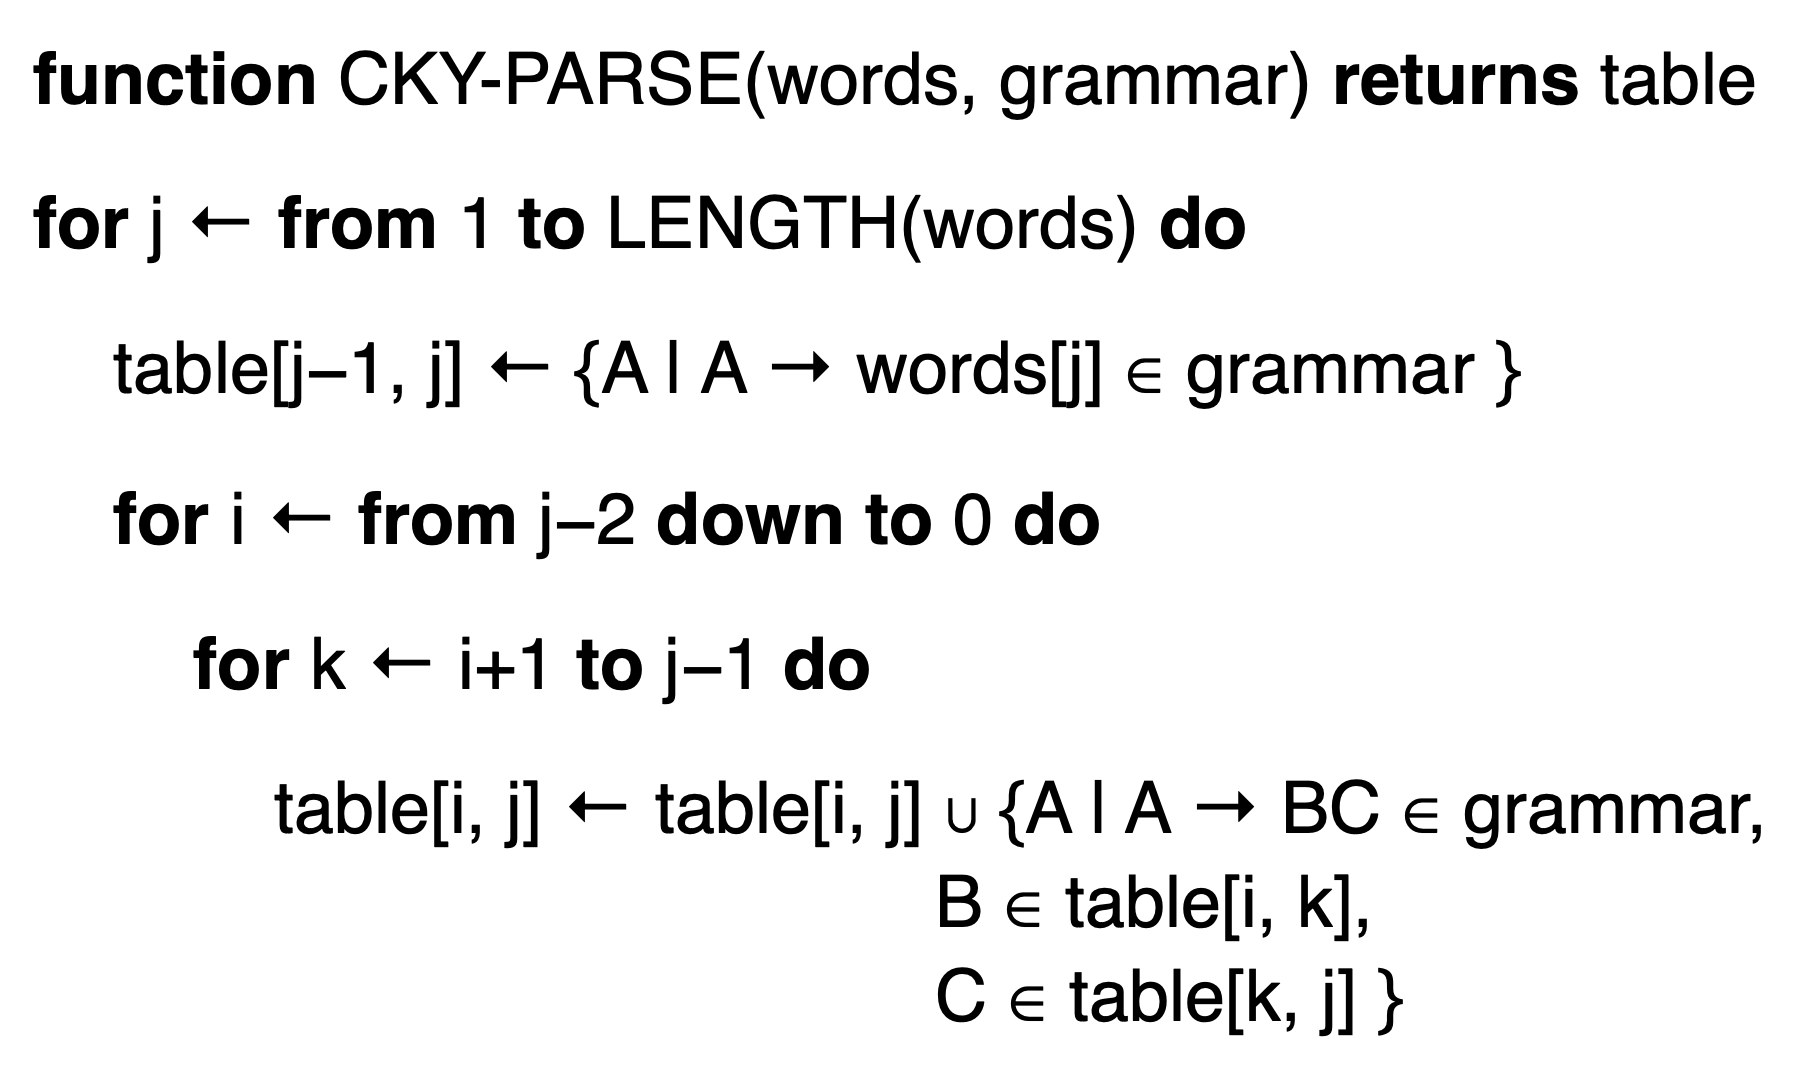

In [34]:
def cky(grammar, sentence):
    # Eure Lösung für 2.1 hier
    parsing_table = []
    words = sentence.split()
    n = len(words)
    for j in range(1, n):
        listevonj = []
        for i in range(len(grammar)):
            if(words[j-1] in grammar[i][1]):
                listevonj.append(grammar[i][0])
        parsing_table.append(listevonj)

    success = False 
    return parsing_table, success

cky(g1, s2)

([['Aux'],
  ['Pronoun', 'NP'],
  ['Noun', 'Nominal', 'S', 'Verb', 'VP'],
  ['Det'],
  ['Noun', 'Nominal'],
  ['Preposition'],
  ['Proper-Noun', 'NP'],
  ['Preposition']],
 False)

In [15]:
table1, parse_success = cky(g1, s2)

def display_table(sentence, table):
    ln_break = "\n"
    if len(table[0]) > len(sentence.split()):
        display(Markdown(f"""
||{"|".join(sentence.split())}|
|---|--{"|".join("---" for _ in sentence.split())}---|
{"".join(("|"+ "|".join((str(cell) if cell else "") for cell in row) + "|") + ln_break  for row in table)}
"""))
    else:
        display(Markdown(f"""
|{"|".join(sentence.split())}|
|--{"|".join("---" for _ in sentence.split())}---|
{"".join(("|"+ "|".join((str(cell) if cell else "") for cell in row) + "|") + ln_break  for row in table)}
"""))

print(f"Grammar G1 {'parses' if parse_success else 'does not parse'} sentence S2")
print(display_table(s2, g1))

Grammar G1 parses sentence S2



|does|she|book|a|flight|from|Houston|to|TWA|
|-----|---|---|---|---|---|---|---|------|
|S|('NP', 'VP')|
|S|('X1', 'VP')|
|X1|('Aux', 'NP')|
|S|('Verb', 'NP')|
|S|('X2', 'PP')|
|S|('Verb', 'PP')|
|S|('VP', 'PP')|
|NP|('Det', 'Nominal')|
|Nominal|('Nominal', 'Noun')|
|Nominal|('Nominal', 'PP')|
|VP|('Verb', 'NP')|
|VP|('X2', 'PP')|
|X2|('Verb', 'NP')|
|VP|('Verb', 'PP')|
|VP|('VP', 'PP')|
|PP|('Preposition', 'NP')|
|Det|{'the', 'a', 'this', 'that'}|
|Noun|{'money', 'flight', 'book', 'meal'}|
|Nominal|{'money', 'flight', 'book', 'meal'}|
|S|{'include', 'book', 'prefer'}|
|Verb|{'include', 'book', 'prefer'}|
|VP|{'include', 'book', 'prefer'}|
|Pronoun|{'me', 'she', 'I'}|
|Proper-Noun|{'Houston', 'TWA'}|
|NP|{'me', 'she', 'I'}|
|NP|{'Houston', 'TWA'}|
|Aux|{'does'}|
|Preposition|{'from', 'near', 'on', 'to', 'through'}|



None


### A2.2: _(4 Punkte)_
Extrahiert alle möglichen Syntaxbäume für S2 aus der in Teilaufgabe A2.1 produzierten Tabelle.

In [ ]:
from itertools import product


class Node:
    def __init__(self, name, children=None, is_terminal=False):
        self.name = name
        self.children = children if children else []
        self.is_terminal = is_terminal

    def __str__(self):
        return f"<<I>{self.name}</I>>" if self.is_terminal else self.name
    

def extract_trees(grammar, table, sentence):
    """ returns a list of root nodes of the results"""
    
    # Hier eure Lösung für das Extrahieren der Bäume.
    # Gibt die Bäume als Liste der Root Nodes zurück 
    # return [Node("S", [Node(...), ...]), ...]  ## is_terminal=True
    
    return []

In [ ]:
import graphviz

def plot_syntax_trees(trees):
    ln_break = "\n"
    for tree in trees:
        node_buffer = [tree]
        number_nodes = 0
        tree.id_ = str(number_nodes)
        dot_strings = []
        dot_strings.append(f'n{tree.id_} ; n{tree.id_} [label={tree}] ; ')
        rank_same = []
        while node_buffer:
            node = node_buffer.pop(0)
            for child in node.children:
                node_buffer.append(child)
                number_nodes += 1
                child.id_ = str(number_nodes)
                dot_strings.append(f'n{child.id_} ;{ln_break}n{child.id_} [label={child}] ;')
                dot_strings.append(f"n{node.id_} -- n{child.id_} ;")
                if child.is_terminal:
                    rank_same.append(f"n{child.id_}; ")

        display(graphviz.Source(f"""
        graph {{
            fontname="Helvetica,Arial,sans-serif"
            node [fontname="Helvetica,Arial,sans-serif"]
            edge [fontname="Helvetica,Arial,sans-serif"]
            rankdir=TD;
            node [shape = plaintext];
            {f"{ln_break}".join(dot_strings)}
            {{rank = same; {''.join(rank_same)}}}
        }}
        """))

if parse_success:
    plot_syntax_trees(extract_trees(g1, table1, s2))

### A2.3: _(2 Punkte)_
Beschreibe den Eintrag in Reihe 2 (0-indiziert, sonst Reihe 3) von Wort "flight". Wie wird diese Zelle berechnet (In eigenen Worten beschreiben; Formel reicht nicht aus)? Welche Einträge waren in diesem Beipiel für den Eintrag entscheident?

#### Antwort:
    <hier Lösung der Teilaufgabe 2.3>

## Aufgabe 3: _(7 Punkte)_
Wechsel zu Vorlesung 5: Semantik.

### A3.1: _(3 Punkte)_
Definiert eine semantische Modellwelt für die Domäne des folgenden Szenarios. Definiert dazu die Properties
_Person_, _Hometown_, _Restaurant_, _Cuisine_ und _Foodtype_. Benutzt diese Properties um die Relationen _Friends_, _LivesIn_, _PerferredFoodType_, _WouldGoTo_, _Serves_ und _ServedFoodTypeIs_ sinnvoll zu definieren (Siehe Form der Semantische Attachements in A3.2). Nehmt die definierten Relationen in die Modellwelt auf.

> Bill, Ted and Morti are friends. Bill and Ted live in San Dimas, Morti lives in the Underworld. There are three good restaurants in San Dimas, the Lucky Elephant, the Zendejas and the Applebee's. The Lucky Elephant serves Thai cuisine, the Zendejas mexican dishes. Morti is on a diet and likes to eat vegetarian dishes only available at the Lucky Elephant. Bill and Ted prefer meaty food and hence like the Zendejas or the BBQ at Applebee's. But Bill is generally fine with eating Thai food too.   

#### Antwort:

    Properties:

    Person = {Bill, Ted, Morti}
    Hometown = {San Dimas, Underworld}
    Restarant = {Lucky Elephant, Zendejas, Applebee's}
    Cuisine = {Thai, Mexican}
    Foodtype = {Vegetarian, Meaty}

    Relationen:

    Friends = {(Bill, Ted), (Ted, Bill), (Bill, Morty), (Morty, Bill), (Morty, Ted), (Ted, Morty)}
    LivesIn = {(Bill, San Dimas), (Ted, San Dimas), (Morti, Underworld)}
    PerferredFoodType = {(Bill, Meaty), (Ted, Meaty), (Morti, Vegetarian)}
    WouldGoTo = {(Bill, Zendejas), (Bill, Applebee's), (Bill, Lucky Elephant), (Ted, Applebee's), (Ted, Zendejas), (Morti, Lucky Elephant)}
    Serves = {(Lucky Elephant, Thai), (Zendejas, Mexican), (Applebee's, BBQ)}
    ServedFoodTypeIs = {(Lucky Elephant, Vegetarian), (Zendejas, Meaty), (Applebee's, Meaty)}


### A3.2: _(4 Punkte)_
Benutzt die zu der Grammatik G3 gegebenen semantischen Attachments, um die semantische Bedeutung der Sätze S3 und S4 abzuleiten. Gebt jeweils die Zwischenschritte mit an. Hierfür benötigt ihr die Syntaxbäume der Sätze.

In [ ]:
N = Node
plot_syntax_trees([
    N("S3", [N("NP", [N("Det", [N("Every", is_terminal=True)]), N("Nominal", [N("Noun", [N("Restaurant", is_terminal=True)])])]), N("VP", [N("Verb", [N("serves", is_terminal=True)]), N("NP", [N("ProperNoun", [N("water", is_terminal=True)])])])]),
    N("S4", [N("NP", [N("ProperNoun", [N("Applebee's", is_terminal=True)])]), N("VP", [N("Verb", [N("serves", is_terminal=True)]),N("NP", [N("Det", [N("every", is_terminal=True)]), N("Nomi", [N("Noun", [N("meat", is_terminal=True)])])])])])
])

| Grammatik G3 |  |  | Semantische Attachement für G3 |
| ---:      |:---:| :---      |:---:                  |
| S         | → | NP VP       |{NP.sem(VP.sem)}       |
| NP        | → | Det Nominal |{Det.sem(Nominal.sem)} |
| NP        | → | ProperNoun  |{ProperNoun.sem}       |
| NP        | → | Nominal     |{Nominal.sem}          |
| Nominal   | → | Noun        |{Noun.sem}             |
| VP        | → | Verb NP     |{Verb.sem(NP.sem)}     |
| Det       | → | _every_     |{λP.λQ.∀xP (x) ⇒ Q(x)} |
| Noun      | → | _restaurant_|{λr.Restaurant(r)}     |
| ProperNoun| → | _water_     |{λa.a(Water)}          |
| Noun      | → | _meat_      |{λm.Meat(m)}           |
| ProperNoun| → | _Applebee’s_|{λa.a(Applebee’s)}     |
| Verb      | → | _serves_    |{λw.λz.w(λx.∃eServes(e) ∧ Server(e, z) ∧ Served(e, x))}|

**S3:**
> every restaurant serves water

**S4:**
> Applebee’s serves every meat

#### Antwort:

**S3:**

every → {{λP.λQ.∀xP(x) ⇒ Q(x)}} → {A(x) ⇒ B(x)}

restaurant → {λr.Restaurant(r)(R)} → {Restaurant(R)}

serves → {λw.λz.w(λx.∃eServes(e) ∧ Server(e, z) ∧ Served(e, x))} → {W(∃eServes(e) ∧ Server(e, Z) ∧ Served(e, X)}

water → {λa.a(Water)} →  {A(Water)}

every restaurant serves water = {A(x) ⇒ B(x)} ∧ {Restaurant(R)} ∧ {W(∃eServes(e) ∧ Server(e, Z) ∧ Served(e, X)} ∧ {A(Water)}

Ey garkeine Ahnung ob das ist ist. Ich checke das echt nicht.